In [1]:
%load_ext autoreload
%autoreload 2
from src.data.make_dataset import make_cat_dict,calc_reactor_metrics

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [4]:
plt.style.use('seaborn-talk')
cmap = plt.get_cmap("tab10")

# 1) Exploring trends in raw data

First lets load in the raw data with computed metrics.

In [3]:
#load in reactor data
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
fname = "2-cleanedup_Round1-Standardized.csv"
df = pd.read_csv(processed_dir+"/"+fname,index_col=0)
df.head()

,Catalyst,Reaction,Tube,Date,Mass Catalyst,Mass Diluent,k_d,Y0,lifetime_yield,Y_pc,sqrtY0Y_pc,Pt,Sn,Ga,Fe,Cu,Ca,Mn,Zn
0,Pt1/γ-Al2O3 2/5/24,24-005,1,2024-02-05,20.0,120.2,0.011951,0.093141,7.793377,7.350753,0.827439,1,0,0,0,0,0,0,0
1,Pt1/γ-Al2O3 2/5/24,24-005,2,2024-02-05,20.1,120.0,0.011695,0.138308,11.826379,11.112063,1.239711,1,0,0,0,0,0,0,0
2,Pt1/γ-Al2O3 2/5/24,24-005,3,2024-02-05,20.0,120.0,0.010522,0.063163,6.002886,5.522449,0.590604,1,0,0,0,0,0,0,0
3,Pt1/γ-Al2O3 2/5/24,24-005,4,2024-02-05,20.0,120.0,0.009353,0.055320,5.915015,5.288208,0.540875,1,0,0,0,0,0,0,0
4,Pt1/γ-Al2O3 2/5/24,24-005,5,2024-02-05,20.1,120.2,0.009263,0.062064,6.700162,5.974731,0.608945,1,0,0,0,0,0,0,0


Next we generate plots for each bimetallic.

In [5]:

def get_bimetallics_of_x(df,x,metals=['Sn','Ga','Fe','Cu','Ca']):
    #returns subset of df that contains only metal x and Pt, no trimetallics or more
    df_ret = df
    for metal in metals:
        if metal != x:
            df_ret = df_ret[df_ret[metal] == 0]
    return df_ret

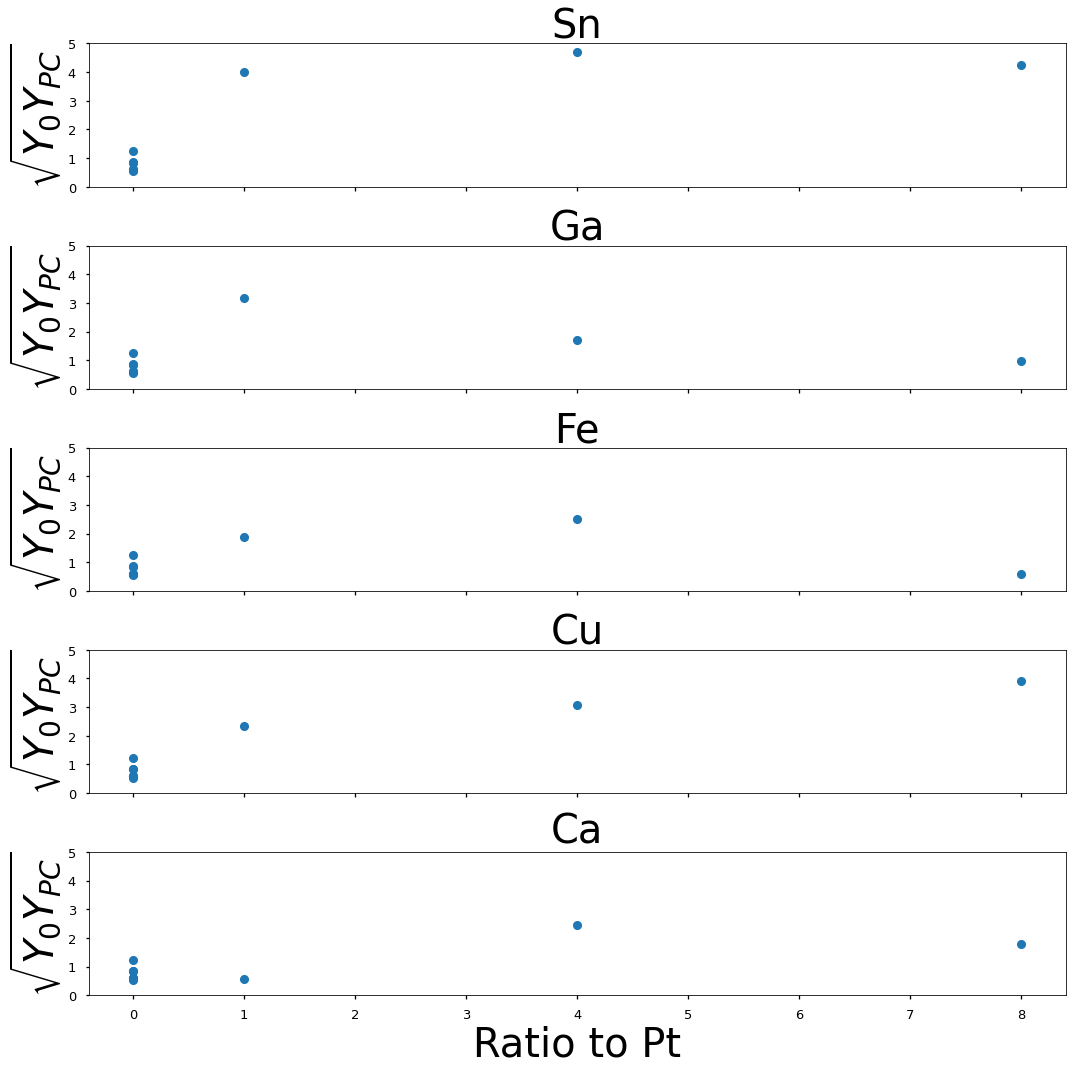

In [27]:
metals = ['Sn','Ga','Fe','Cu','Ca']
metric = 'sqrtY0Y_pc'


fig, axs = plt.subplots(5,sharex=True,figsize=(15, 15))
for i,metal in enumerate(metals):
    df_subset = get_bimetallics_of_x(df,metal)
    axs[i].plot(df_subset[metal],df_subset[metric],'o',label=metal)
    axs[i].set_title(metal,fontsize=40)
    axs[i].set_ylim([0, 5])
    axs[i].set_ylabel('$\sqrt{Y_0Y_{PC}}$',fontsize=40)
plt.xlabel('Ratio to Pt',fontsize=40)

# plt.legend(loc='best')

fig.tight_layout()
#plt.savefig('./figures/feature-vs-sqrtyoypc.png',dpi=300,bbox_inches="tight")
    


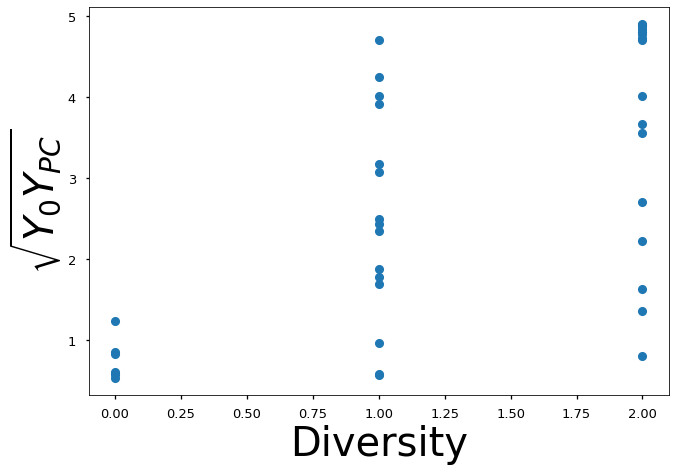

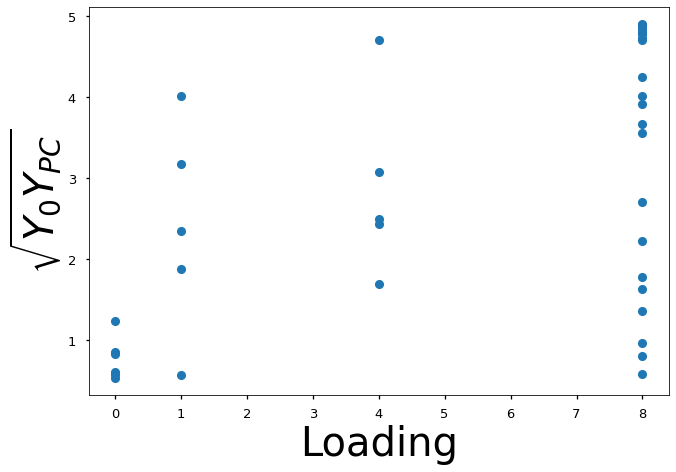

In [31]:
metals = ['Sn','Ga','Fe','Cu','Ca']
metric = 'sqrtY0Y_pc'

df["diversity"] =df[metals].astype(bool).sum(axis=1) #counts non-zero in a given row https://stackoverflow.com/questions/26053849/counting-non-zero-values-in-each-column-of-a-dataframe-in-python
plt.plot(df["diversity"],df[metric],'o',label=metal)
plt.ylabel("$\sqrt{Y_0Y_{PC}}$",fontsize=40)
plt.xlabel("Diversity",fontsize=40)
#plt.savefig('./figures/diversity-vs-sqrtyoypc.png',dpi=300,bbox_inches="tight")
plt.show()

df["loading"] =df[metals].sum(axis=1)
plt.plot(df["loading"],df[metric],'o',label=metal)
plt.ylabel("$\sqrt{Y_0Y_{PC}}$",fontsize=40)
plt.xlabel("Loading",fontsize=40)
#plt.savefig('./figures/loading-vs-sqrtyoypc.png',dpi=300,bbox_inches="tight")
plt.show()

0     0
1     0
2     0
3     0
4     0
5     0
6     8
7     8
8     8
9     8
10    8
11    8
12    8
14    8
18    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    8
32    8
33    1
34    4
35    8
40    4
41    0
42    4
43    1
44    8
45    1
46    4
47    8
48    8
49    1
50    4
51    8
52    1
Name: loading, dtype: int64

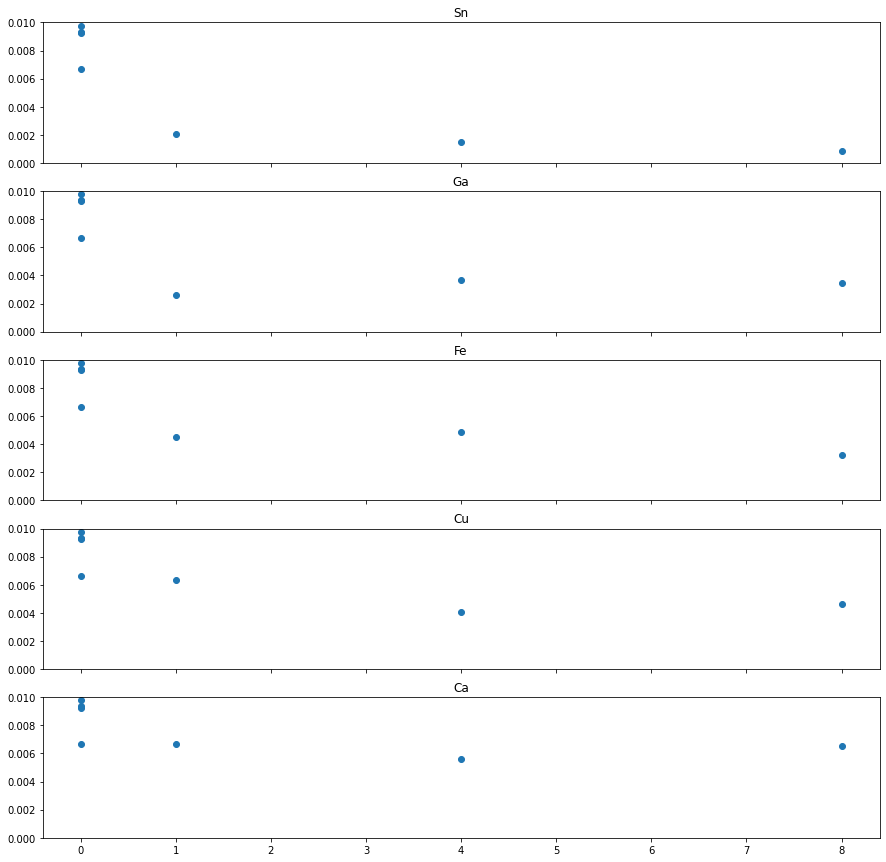

In [13]:
metals = ['Sn','Ga','Fe','Cu','Ca']
metric = 'k_d'


fig, axs = plt.subplots(5,sharex=True,figsize=(15, 15))
for i,metal in enumerate(metals):
    df_subset = get_bimetallics_of_x(df,metal)
    axs[i].plot(df_subset[metal],df_subset[metric],'o',label=metal)
    axs[i].set_title(metal)
    axs[i].set_ylim([0, 0.01])
# plt.xlabel('Ratio to Pt')
# plt.ylabel(metric)
# plt.legend(loc='best')

# fig.tight_layout()
    


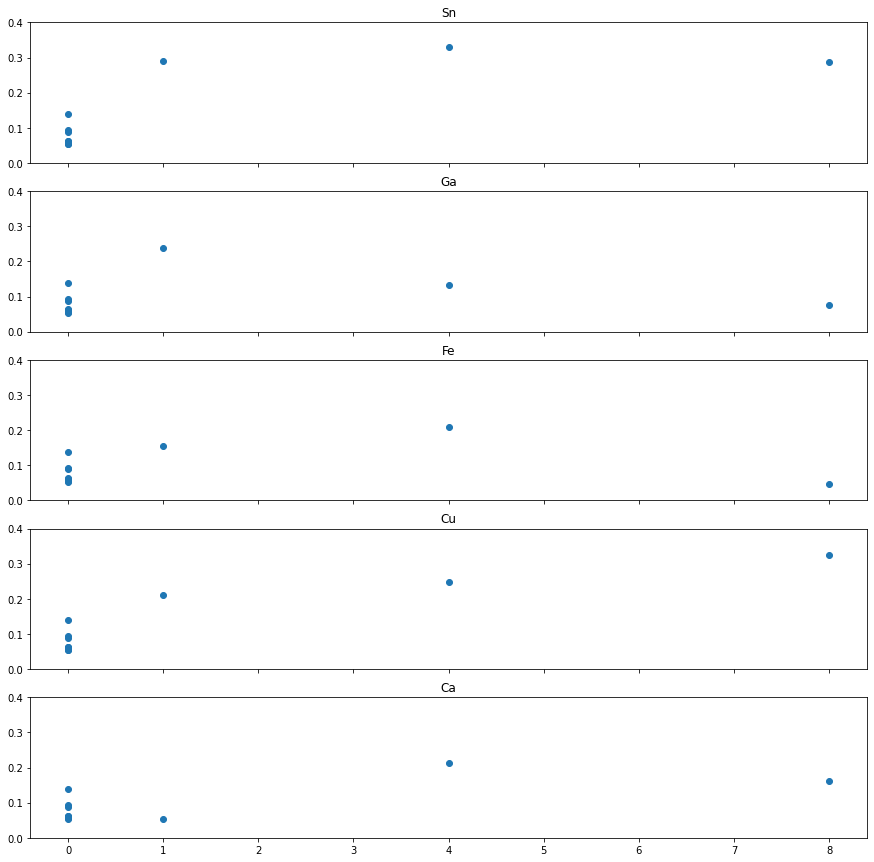

In [14]:
metals = ['Sn','Ga','Fe','Cu','Ca']
metric = 'Y0'



fig, axs = plt.subplots(5,sharex=True,figsize=(15, 15))
for i,metal in enumerate(metals):
    df_subset = get_bimetallics_of_x(df,metal)
    axs[i].plot(df_subset[metal],df_subset[metric],'o',label=metal)
    axs[i].set_title(metal)
    axs[i].set_ylim([0, 0.4])
# plt.xlabel('Ratio to Pt')
# plt.ylabel(metric)
# plt.legend(loc='best')

# fig.tight_layout()
    


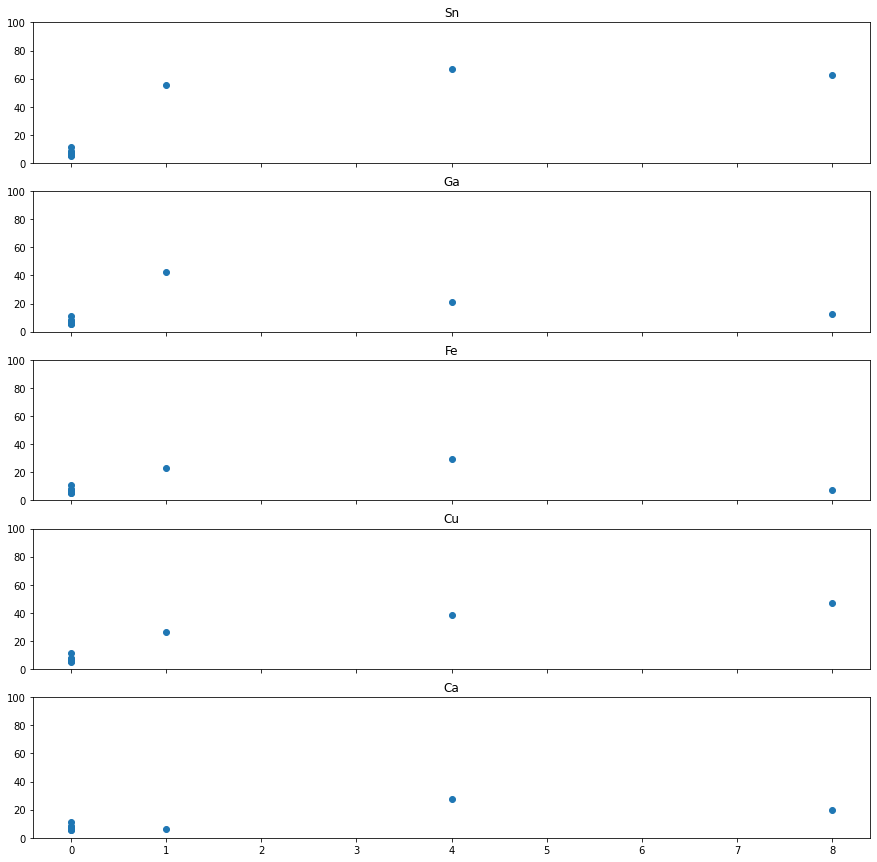

In [15]:
metals = ['Sn','Ga','Fe','Cu','Ca']
metric = 'Y_pc'

fig, axs = plt.subplots(5,sharex=True,figsize=(15, 15))
for i,metal in enumerate(metals):
    df_subset = get_bimetallics_of_x(df,metal)
    axs[i].plot(df_subset[metal],df_subset[metric],'o',label=metal)
    axs[i].set_title(metal)
    axs[i].set_ylim([0, 100])
# plt.xlabel('Ratio to Pt')
# plt.ylabel(metric)
# plt.legend(loc='best')

# fig.tight_layout()
    
